# Tutorial 3 - Boosting Search via Symmetry Breaking, Implied Constraints, Randomisation, and Restarts 'NOTES Perso: inverse implied and redundent + 
revisit the exact parameters so that restars work) 

**Please do not read untill you fully finish the first 2 tutorials**

Congratulations! you are now level one constraint programmer: you know the basics on how to model a problem, how to display solutions, how to evaluate models, and how to choose a good branching strategy !! **I'm so proud of you!**

In this tutorial we slowly dive into advanced techniques. We also start to use arithmetic constraints and solve optimisation problems.

In [1]:
from config import setup
setup()

## Golomb ruler

Your goal is to place $N$ marks on a ruler, such that no two marks are at the same distance and the total length of the ruler (the position of the last mark) is minimized. 

<div class="row" style="margin-top: 10px">
    <img src="display/images/Golomb_Ruler-4.svg" style="display: block; margin: auto; width: 400px;" />
    <p style="margin: auto; margin-top: 10px; text-align: center;">Golomb ruler of order 4 and length 6. This ruler is both optimal and perfect.</p>
</div>

Golomb ruler can be used in information theory to design error correcting codes or in telecommunications to avoid interferences during radio communications. You can read about it here https://en.wikipedia.org/wiki/Golomb_ruler#:~:targetText=In%20mathematics%2C%20a%20Golomb%20ruler,are%20the%20same%20distance%20apart.&targetText=It%20has%20been%20proven%20that,of%20the%20same%20order%20exists.


**In the rest of this tutorial (except the last part), please use the following parameter with the solve method:**

```
SearchType= 'DepthFirst'
```

Also, in order to control the level of filtering (arc consistency, bound consistency, forward checking, etc), CPoptimizer offers to use a parameter called $DefaultInferenceLevel$  http://ibmdecisionoptimization.github.io/docplex-doc/cp/docplex.cp.parameters.py.html?highlight=defaultinferencelevel#docplex.cp.parameters.CpoParameters.DefaultInferenceLevel

In the rest of this tutorial, you are required to test all three possibilities


```
DefaultInferenceLevel=Low
DefaultInferenceLevel=Medium
DefaultInferenceLevel=Extended

```

After a while, if you see one that you particularly find efficient (runtime), you can use it for the rest of the tutorial. 


Create a model for the decision version of this problem. That is, given $n$ marks, and a ruler of size $m$, place the $n$ markers such that no two markers are at the same distance. 

You are free to use any constraint you want. However, you must declare and use the minimum amount of constraints (**NOT A SINGLE UNNESSASARY CONSTRAINT**)

Note that for N marks, a ruler of length $2 ^ {N -1}$ can be found (I let you figure out why). 

Write a funtion decision_model(n,m) that builds and returns the correspondant model. 

In [2]:
from docplex.cp.model import CpoModel
from docplex.cp.modeler import all_diff, min, max
import numpy as np
import matplotlib.pyplot as plt

def decision_model(m,n):
    model = CpoModel(name="Golomb ruler of order {} and length {}".format(n,m))
    x = model.integer_var_list(n, 0, m, 'x')
    for i in range(n-1):
        model.add(x[i]<x[i+1])    
#     model.add(all_diff(x))  
    model.add(all_diff([x[j]-x[i] for i in range(n) 
                                    for j in range(i+1,n)])) 

    model.print_information()
    model.add(x[-1] == m)
    #model.add(x[0] == 0)
    
    return model,x

In [3]:
model,x = decision_model(6,4)
model.print_information()

Model: Golomb ruler of order 4 and length 6
 - source file: /var/folders/q1/f955m41s7q3gr7vlc1_jtkth0000gs/T/ipykernel_98510/1258366362.py
 - modeling time: 0.00 sec
 - number of integer variables:  4
 - number of interval variables: 0
 - number of sequence variables: 0
 - number of state functions:    0
 - number of float variables:    0
 - number of constraints:        4
 - number of root expressions:   4
 - number of expression nodes:   15
 - operations:                   alldiff: 1, less: 3, minus: 6
Model: Golomb ruler of order 4 and length 6
 - source file: /var/folders/q1/f955m41s7q3gr7vlc1_jtkth0000gs/T/ipykernel_98510/1258366362.py
 - modeling time: 0.00 sec
 - number of integer variables:  4
 - number of interval variables: 0
 - number of sequence variables: 0
 - number of state functions:    0
 - number of float variables:    0
 - number of constraints:        5
 - number of root expressions:   5
 - number of expression nodes:   17
 - operations:                   alldiff: 1

Solve the problem for n=4, m=6. Then try different values of (n,m) (but don't waste too much time). 

In [4]:
sol = model.solve(SearchType='DepthFirst',  DefaultInferenceLevel='Low')
sol.print_solution()

 ! ----------------------------------------------------------------------------
 ! Satisfiability problem - 4 variables, 5 constraints
 ! Workers              = 1
 ! DefaultInferenceLevel = Low
 ! Presolve             = Off
 ! SearchType           = DepthFirst
 ! Initial process time : 0.00s (0.00s extraction + 0.00s propagation)
 !  . Log search space  : 11.2 (before), 11.2 (after)
 !  . Memory usage      : 298.9 kB (before), 298.9 kB (after)
 ! Using sequential search.
 ! ----------------------------------------------------------------------------
 !               Branches  Non-fixed            Branch decision
 *                      3  0.00s                  3 != x_2
 ! ----------------------------------------------------------------------------
 ! Search completed, 1 solution found.
 ! ----------------------------------------------------------------------------
 ! Number of branches     : 3
 ! Number of fails        : 1
 ! Total memory usage     : 541.8 kB (502.0 kB CP Optimizer + 

You can display to solution using  :  

```
from display import golomb as display_golomb
display_golomb([sol[m] for m in marks])
```

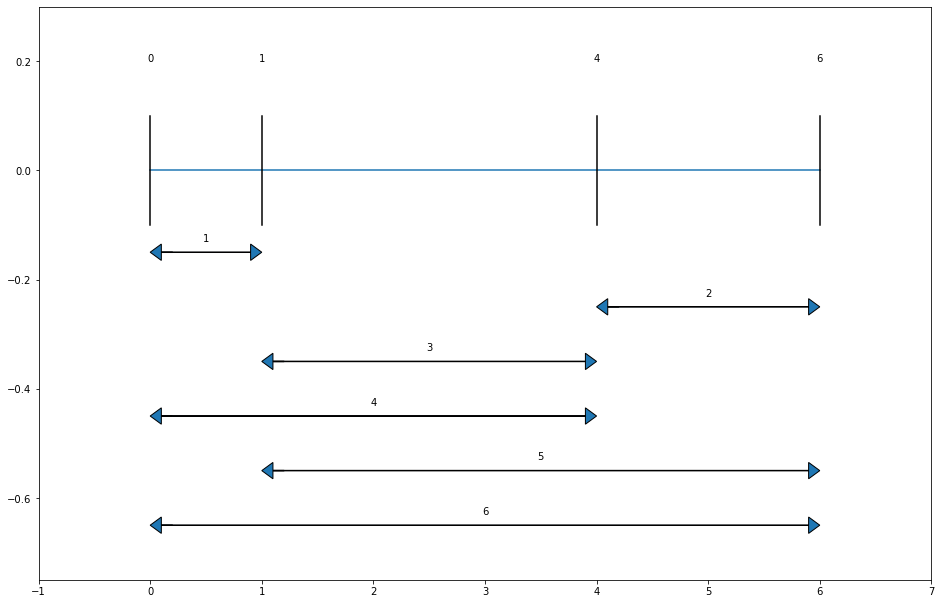

In [5]:
from display import golomb as display_golomb
display_golomb([sol[m] for m in x])

In [6]:
def run_and_display(m,n,InfLevel):
    model,x = decision_model(m,n)
    sol = model.solve(SearchType='DepthFirst',  DefaultInferenceLevel=InfLevel)
    if sol.get_solve_status() == 'Feasible':
        display_golomb([sol[m] for m in x])

        lsols = model.start_search(SearchType='DepthFirst',  DefaultInferenceLevel=InfLevel)
        nsol = 0
        for sol in lsols:
            nsol += 1
        print("Total nb of solutions : ", nsol)
    else:
        print('There is no solution!')

Print and display all the sulutions for (n,m) = (4,6) and (4,7)

Model: Golomb ruler of order 4 and length 6
 - source file: /var/folders/q1/f955m41s7q3gr7vlc1_jtkth0000gs/T/ipykernel_98510/1258366362.py
 - modeling time: 0.00 sec
 - number of integer variables:  4
 - number of interval variables: 0
 - number of sequence variables: 0
 - number of state functions:    0
 - number of float variables:    0
 - number of constraints:        4
 - number of root expressions:   4
 - number of expression nodes:   15
 - operations:                   alldiff: 1, less: 3, minus: 6
 ! ----------------------------------------------------------------------------
 ! Satisfiability problem - 4 variables, 5 constraints
 ! Workers              = 1
 ! Presolve             = Off
 ! SearchType           = DepthFirst
 ! Initial process time : 0.00s (0.00s extraction + 0.00s propagation)
 !  . Log search space  : 11.2 (before), 11.2 (after)
 !  . Memory usage      : 298.9 kB (before), 298.9 kB (after)
 ! Using sequential search.
 ! ------------------------------------------

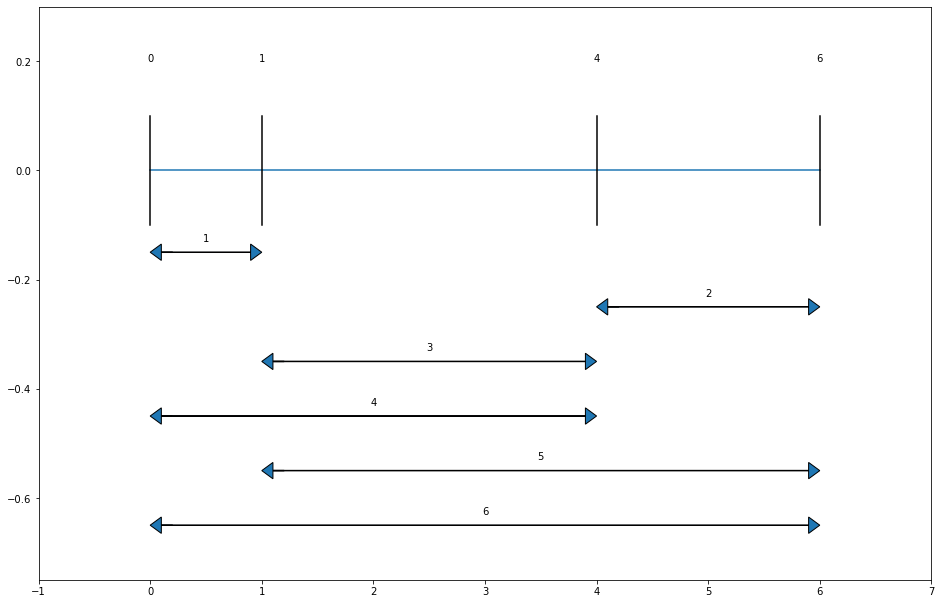

 ! ----------------------------------------------------------------------------
 ! Satisfiability problem - 4 variables, 5 constraints
 ! Workers              = 1
 ! Presolve             = Off
 ! SearchType           = DepthFirst
 ! Initial process time : 0.00s (0.00s extraction + 0.00s propagation)
 !  . Log search space  : 11.2 (before), 11.2 (after)
 !  . Memory usage      : 298.9 kB (before), 298.9 kB (after)
 ! Using sequential search.
 ! ----------------------------------------------------------------------------
 !               Branches  Non-fixed            Branch decision
 *                      3  0.00s                  3 != x_2
 *                      9  0.00s                  2  = x_1
 ! ----------------------------------------------------------------------------
 ! Search completed, 2 solutions found.
 ! ----------------------------------------------------------------------------
 ! Number of branches     : 10
 ! Number of fails        : 4
 ! Total memory usage     : 542.

In [7]:
run_and_display(6,4,'Basic')

In [8]:
run_and_display(7,4,'Low')

Model: Golomb ruler of order 4 and length 7
 - source file: /var/folders/q1/f955m41s7q3gr7vlc1_jtkth0000gs/T/ipykernel_98510/1258366362.py
 - modeling time: 0.01 sec
 - number of integer variables:  4
 - number of interval variables: 0
 - number of sequence variables: 0
 - number of state functions:    0
 - number of float variables:    0
 - number of constraints:        4
 - number of root expressions:   4
 - number of expression nodes:   15
 - operations:                   alldiff: 1, less: 3, minus: 6
 ! ----------------------------------------------------------------------------
 ! Satisfiability problem - 4 variables, 5 constraints
 ! Workers              = 1
 ! DefaultInferenceLevel = Low
 ! Presolve             = Off
 ! SearchType           = DepthFirst
 ! Initial process time : 0.00s (0.00s extraction + 0.00s propagation)
 !  . Log search space  : 12.0 (before), 12.0 (after)
 !  . Memory usage      : 298.9 kB (before), 298.9 kB (after)
 ! Using sequential search.
 ! -----------

 ! ----------------------------------------------------------------------------
 ! Satisfiability problem - 4 variables, 5 constraints
 ! Workers              = 1
 ! DefaultInferenceLevel = Low
 ! Presolve             = Off
 ! SearchType           = DepthFirst
 ! Initial process time : 0.00s (0.00s extraction + 0.00s propagation)
 !  . Log search space  : 12.0 (before), 12.0 (after)
 !  . Memory usage      : 298.9 kB (before), 298.9 kB (after)
 ! Using sequential search.
 ! ----------------------------------------------------------------------------
 !               Branches  Non-fixed            Branch decision
 *                      2  0.00s                  3  = x_2
 *                      5  0.00s                  4 != x_2
 *                      7  0.00s                  3  = x_2
 *                     14  0.00s                  2  = x_1
 *                     15  0.00s                  2 != x_1
 *                     17  0.00s                  2  = x_1
 *                     19 

In [9]:
run_and_display(10,5,'Basic')

Model: Golomb ruler of order 5 and length 10
 - source file: /var/folders/q1/f955m41s7q3gr7vlc1_jtkth0000gs/T/ipykernel_98510/1258366362.py
 - modeling time: 0.00 sec
 - number of integer variables:  5
 - number of interval variables: 0
 - number of sequence variables: 0
 - number of state functions:    0
 - number of float variables:    0
 - number of constraints:        5
 - number of root expressions:   5
 - number of expression nodes:   21
 - operations:                   alldiff: 1, less: 4, minus: 10
 ! ----------------------------------------------------------------------------
 ! Satisfiability problem - 5 variables, 6 constraints
 ! Workers              = 1
 ! Presolve             = Off
 ! SearchType           = DepthFirst
 ! Initial process time : 0.00s (0.00s extraction + 0.00s propagation)
 !  . Log search space  : 17.3 (before), 17.3 (after)
 !  . Memory usage      : 298.9 kB (before), 298.9 kB (after)
 ! Using sequential search.
 ! ----------------------------------------

Write a funtion  basic_optimisation_model(n) that builds and returns the correspondant model for the
optimisation problem. Note that an optimisation function can be seen as a variable. In order to specify the variable to optimise, we can simply use : 

```
model.add(model.minimize(myvariable))
```

or 

```
model.add(model.maximize(myvariable))
```


In [10]:
def basic_optimisation_model(n):
    model = CpoModel(name="The shortest Golomb ruler of order {} ".format(n))
    x = model.integer_var_list(n, 0, n*n, 'x') ## G(n) <= n^2
    
    for i in range(n-1):
        model.add(x[i] < x[i+1]) 
    model.add(all_diff([x[i]-x[j] for i in range(n) for j in range(i)])) 

    model.add(model.minimize(x[-1]))
    return model,x

In [11]:
test_model, x  = basic_optimisation_model(6)
test_model.print_information()

Model: The shortest Golomb ruler of order 6 
 - source file: /var/folders/q1/f955m41s7q3gr7vlc1_jtkth0000gs/T/ipykernel_98510/1983510843.py
 - modeling time: 0.00 sec
 - number of integer variables:  6
 - number of interval variables: 0
 - number of sequence variables: 0
 - number of state functions:    0
 - number of float variables:    0
 - number of constraints:        7
 - number of root expressions:   7
 - number of expression nodes:   29
 - operations:                   alldiff: 1, less: 5, minimize: 1, minus: 15


 ! ----------------------------------------------------------------------------
 ! Minimization problem - 6 variables, 6 constraints
 ! Workers              = 1
 ! DefaultInferenceLevel = Low
 ! Presolve             = Off
 ! SearchType           = DepthFirst
 ! Initial process time : 0.00s (0.00s extraction + 0.00s propagation)
 !  . Log search space  : 31.3 (before), 31.3 (after)
 !  . Memory usage      : 299.0 kB (before), 299.0 kB (after)
 ! Using sequential search.
 ! ----------------------------------------------------------------------------
 !          Best Branches  Non-fixed            Branch decision
                        0          6                 -
 + New bound is 0
 *            21      130  0.00s               (gap is 100.0%)
 *            20      176  0.00s               (gap is 100.0%)
 *            18      183  0.00s               (gap is 100.0%)
 *            17      211  0.00s               (gap is 100.0%)
 ! ------------------------------------------------------

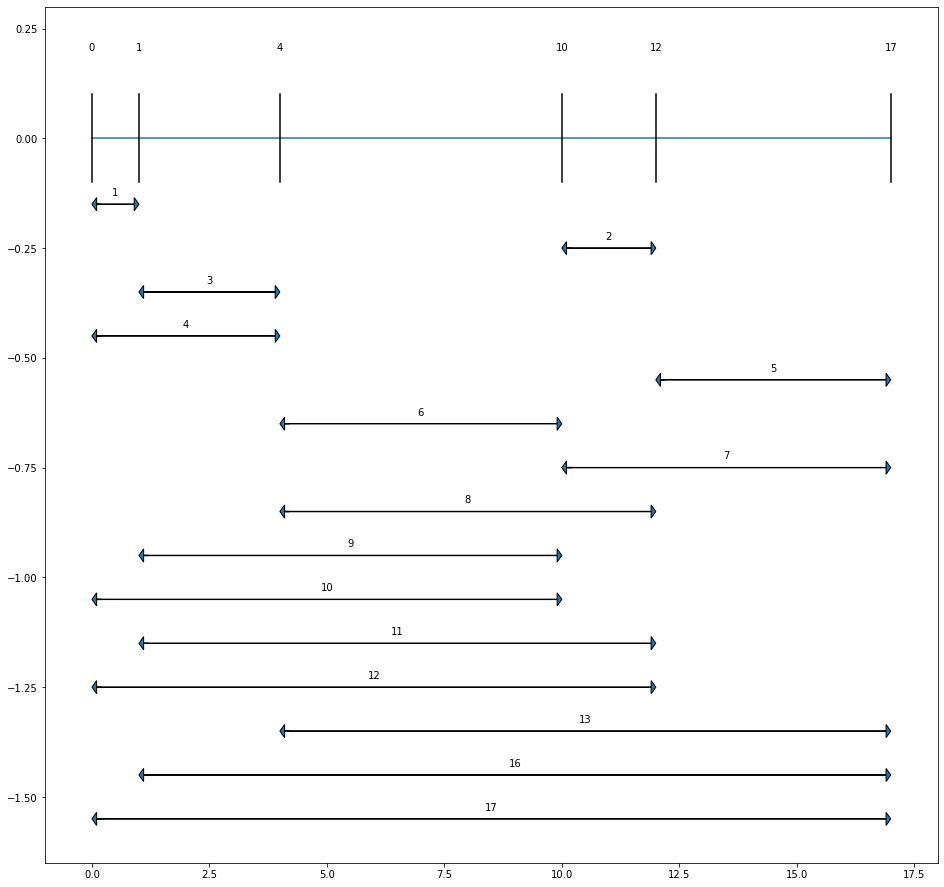

In [12]:
sol = test_model.solve(SearchType='DepthFirst',  DefaultInferenceLevel='Low')
sol.print_solution()
display_golomb([sol[m] for m in x])

In [13]:
sol.get_objective_values()[0]

17

Solve the optimisation problem for N=6.. 10  and display the solution

In [14]:
def run_basic_model(n,InfLevel):
    print("Build basic model...")
    model,x = basic_optimisation_model(n)
    sol = model.solve(SearchType='DepthFirst',  DefaultInferenceLevel=InfLevel)
    # sol.print_solution()
    infos = sol.get_solver_infos()
    if sol.get_solve_status() == 'Optimal':
        print("The shortest Golomb ruler of order {} is = {}, total execution time = {}s".format(n,sol.get_objective_values()[0],infos['TotalTime']))
    else:
        print('There is no solution!')
    return model,x,sol

In [15]:
for n in range(4,10):
    _,_,_ = run_basic_model(n,'Low')

Build basic model...
 ! ----------------------------------------------------------------------------
 ! Minimization problem - 4 variables, 4 constraints
 ! Workers              = 1
 ! DefaultInferenceLevel = Low
 ! Presolve             = Off
 ! SearchType           = DepthFirst
 ! Initial process time : 0.00s (0.00s extraction + 0.00s propagation)
 !  . Log search space  : 16.3 (before), 16.3 (after)
 !  . Memory usage      : 299.0 kB (before), 299.0 kB (after)
 ! Using sequential search.
 ! ----------------------------------------------------------------------------
 !          Best Branches  Non-fixed            Branch decision
                        0          4                 -
 + New bound is 0
 *             7        6  0.00s               (gap is 100.0%)
 *             6       12  0.00s               (gap is 100.0%)
 ! ----------------------------------------------------------------------------
 ! Search completed, 2 solutions found.
 ! Best objective         : 6 (optimal - e

              39     4000          2             12 != x_4
 *            36     4291  0.00s               (gap is 100.0%)
              36     5000          2             13 != x_4
              36     6000          2        F     5  = x_3
 *            35     6147  0.01s               (gap is 100.0%)
 *            34     6519  0.01s               (gap is 100.0%)
              34     7000          2        F    10  = x_4
              34     8000          3              8 != x_3
              34     9000          3              4 != x_2
              34    10000          3             10  = x_3
              34    11000          3        F     8  = x_3
 ! Time = 0.03s, Average fail depth = 6, Memory usage = 590.6 kB
 ! Current bound is 0 (gap is 100.0%)
 !          Best Branches  Non-fixed            Branch decision
              34    12000          3              7 != x_3
              34    13000          2             17 != x_3
              34    14000          2              8 !=

 *            50    21973  0.10s               (gap is 100.0%)
              50    22000          1             13 != x_3
              50    23000          3        F    15  = x_2
              50    24000          2        F    10  = x_3
              50    25000          2        F    15  = x_4
              50    26000          2        F    12  = x_3
              50    27000          3             22 != x_5
              50    28000          2        F    27  = x_4
              50    29000          2             10 != x_2
              50    30000          2              9 != x_5
              50    31000          3             11 != x_4
              50    32000          2        F     5  = x_3
 *            49    32715  0.15s               (gap is 100.0%)
              49    33000          2        F    12  = x_4
 ! Time = 0.15s, Average fail depth = 7, Memory usage = 624.7 kB
 ! Current bound is 0 (gap is 100.0%)
 !          Best Branches  Non-fixed            Branch decision

              44     139k          3        F    17  = x_3
              44     140k          3             11 != x_4
              44     141k          2        F     9  = x_3
              44     142k          3              2  = x_1
              44     143k          2        F    27  = x_3
              44     144k          3             17 != x_4
              44     145k          3        F     6 != x_2
              44     146k          2             23 != x_5
              44     147k          3        F     4  = x_2
              44     148k          2             13 != x_3
              44     149k          3             10 != x_4
              44     150k          2        F    10  = x_2
 ! Time = 0.77s, Average fail depth = 6, Memory usage = 658.8 kB
 ! Current bound is 0 (gap is 100.0%)
 !          Best Branches  Non-fixed            Branch decision
              44     151k          3             15 != x_4
              44     152k          3              6 != x_3
       

              44     261k          3        F    22  = x_4
              44     262k          3              5 != x_0
              44     263k          3        F    23  = x_4
              44     264k          3             14  = x_4
              44     265k          3        F     4  = x_0
              44     266k          3             11 != x_4
              44     267k          3        F     9  = x_4
              44     268k          3              4 != x_0
              44     269k          3        F     5  = x_2
              44     270k          3        F    17 != x_3
 ! Time = 1.46s, Average fail depth = 6, Memory usage = 658.8 kB
 ! Current bound is 0 (gap is 100.0%)
 !          Best Branches  Non-fixed            Branch decision
              44     271k          3              3 != x_0
              44     272k          3        F    18 != x_3
              44     273k          3        F    13  = x_4
              44     274k          3             21 != x_4
       

              44     383k          3        F    16 != x_3
              44     384k          3              3  = x_0
              44     385k          3        F    22  = x_4
              44     386k          3             24 != x_4
              44     387k          3              6  = x_2
              44     388k          2        F    13  = x_3
              44     389k          2        F    11  = x_3
              44     390k          3             17 != x_3
 ! Time = 2.12s, Average fail depth = 6, Memory usage = 658.8 kB
 ! Current bound is 0 (gap is 100.0%)
 !          Best Branches  Non-fixed            Branch decision
              44     391k          3             21 != x_2
              44     392k          3        F     4  = x_1
              44     393k          3        F     8  = x_3
              44     394k          3        F     7  = x_1
              44     395k          3              9 != x_3
              44     396k          4        F    11  = x_3
       

              44     505k          3        F    11 != x_2
              44     506k          4              9 != x_3
              44     507k          3        F     6 != x_1
              44     508k          2        F    13  = x_2
              44     509k          3        F    21  = x_3
              44     510k          3              9  = x_4
 ! Time = 2.76s, Average fail depth = 6, Memory usage = 658.8 kB
 ! Current bound is 0 (gap is 100.0%)
 !          Best Branches  Non-fixed            Branch decision
              44     511k          3        F     8 != x_2
              44     512k          3        F     3 != x_0
              44     513k          3        F     8  = x_3
              44     514k          3             13 != x_3
              44     515k          3        F    24  = x_4
              44     516k          3        F     4  = x_2
              44     517k          4              9 != x_3
              44     518k          3              3 != x_1
       

              44     627k          2        F     2  = x_0
              44     628k          3        F    16 != x_2
              44     629k          2        F    22  = x_4
              44     630k          3              9  = x_5
 ! Time = 3.42s, Average fail depth = 6, Memory usage = 658.8 kB
 ! Current bound is 0 (gap is 100.0%)
 !          Best Branches  Non-fixed            Branch decision
              44     631k          3        F     8 != x_1
              44     632k          2        F    14 != x_3
              44     633k          3              4 != x_0
              44     634k          3        F    11 != x_4
              44     635k          3        F    22 != x_4
              44     636k          2        F    23  = x_4
              44     637k          3        F    15 != x_3
              44     638k          2             25 != x_4
              44     639k          3             22 != x_4
              44     640k          2             14 != x_4
       

In [16]:
for n in range(4,10):
    _,_,_ = run_basic_model(n,'Medium')

Build basic model...
 ! ----------------------------------------------------------------------------
 ! Minimization problem - 4 variables, 4 constraints
 ! Workers              = 1
 ! DefaultInferenceLevel = Medium
 ! Presolve             = Off
 ! SearchType           = DepthFirst
 ! Initial process time : 0.00s (0.00s extraction + 0.00s propagation)
 !  . Log search space  : 16.3 (before), 16.3 (after)
 !  . Memory usage      : 299.0 kB (before), 299.0 kB (after)
 ! Using sequential search.
 ! ----------------------------------------------------------------------------
 !          Best Branches  Non-fixed            Branch decision
                        0          4                 -
 + New bound is 0
 *             7        6  0.00s               (gap is 100.0%)
 *             6       11  0.00s               (gap is 100.0%)
 ! ----------------------------------------------------------------------------
 ! Search completed, 2 solutions found.
 ! Best objective         : 6 (optimal 

              34     5000          2             13  = x_4
              34     6000          2        F    11  = x_3
              34     7000          2        F    15  = x_4
              34     8000          3             16 != x_5
              34     9000          3              9 != x_2
              34    10000          3             16  = x_4
              34    11000          2             15 != x_3
 ! Time = 0.06s, Average fail depth = 6, Memory usage = 590.6 kB
 ! Current bound is 0 (gap is 100.0%)
 !          Best Branches  Non-fixed            Branch decision
              34    12000          3             11 != x_5
              34    13000          2             17 != x_3
              34    14000          2             14  = x_4
              34    15000          2             14 != x_4
              34    16000          2              9 != x_5
              34    17000          4        F     7  = x_3
              34    18000          3             18  = x_4
       

              44    58000          4             11 != x_4
              44    59000          4             19 != x_3
              44    60000          3        F     8 != x_2
              44    61000          3        F    10  = x_2
              44    62000          3             18  = x_4
              44    63000          3        F     4  = x_1
              44    64000          4        F     9 != x_1
              44    65000          3        F     4  = x_1
              44    66000          3             22 != x_5
              44    67000          3        F    11  = x_5
              44    68000          4             17 != x_4
              44    69000          3        F     6  = x_4
              44    70000          3             11 != x_2
 ! Time = 0.52s, Average fail depth = 6, Memory usage = 626.8 kB
 ! Current bound is 0 (gap is 100.0%)
 !          Best Branches  Non-fixed            Branch decision
              44    71000          3             18 != x_5
       

              44     180k          4        F    20  = x_4
              44     181k          3              7 != x_3
              44     182k          4        F     8  = x_3
              44     183k          4              6 != x_1
              44     184k          3        F    13 != x_3
              44     185k          3        F    17  = x_3
              44     186k          4        F     4  = x_1
              44     187k          3        F    11  = x_3
              44     188k          3              6  = x_2
              44     189k          4        F    16  = x_3
              44     190k          3        F    10  = x_3
 ! Time = 1.52s, Average fail depth = 6, Memory usage = 626.8 kB
 ! Current bound is 0 (gap is 100.0%)
 !          Best Branches  Non-fixed            Branch decision
              44     191k          4        F     7  = x_3
              44     192k          4        F    13  = x_3
              44     193k          3             21 != x_3
       

              44     302k          3        F    19  = x_4
              44     303k          3             15 != x_4
              44     304k          3        F     9  = x_2
              44     305k          2        F     8  = x_4
              44     306k          3        F     6  = x_0
              44     307k          3              9 != x_3
              44     308k          3        F     9  = x_2
              44     309k          2              9 != x_4
              44     310k          3             23  = x_4
 ! Time = 2.50s, Average fail depth = 6, Memory usage = 626.8 kB
 ! Current bound is 0 (gap is 100.0%)
 !          Best Branches  Non-fixed            Branch decision
              44     311k          3              4 != x_0
              44     312k          3        F    26  = x_4
              44     313k          2              9 != x_3
              44     314k          3        F    27 != x_4
              44     315k          3        F     7  = x_2
       

In [17]:
for n in range(4,10):
    _,_,_ = run_basic_model(n,'Extended')

Build basic model...
 ! ----------------------------------------------------------------------------
 ! Minimization problem - 4 variables, 4 constraints
 ! Workers              = 1
 ! DefaultInferenceLevel = Extended
 ! Presolve             = Off
 ! SearchType           = DepthFirst
 ! Initial process time : 0.00s (0.00s extraction + 0.00s propagation)
 !  . Log search space  : 16.3 (before), 16.3 (after)
 !  . Memory usage      : 299.0 kB (before), 299.0 kB (after)
 ! Using sequential search.
 ! ----------------------------------------------------------------------------
 !          Best Branches  Non-fixed            Branch decision
                        0          4                 -
 + New bound is 0
 *             7        6  0.00s               (gap is 100.0%)
 *             6       11  0.00s               (gap is 100.0%)
 ! ----------------------------------------------------------------------------
 ! Search completed, 2 solutions found.
 ! Best objective         : 6 (optima

              34     5000          2             13  = x_4
              34     6000          2        F    11  = x_3
              34     7000          2        F    15  = x_4
              34     8000          3             16 != x_5
              34     9000          3              9 != x_2
              34    10000          3             16  = x_4
              34    11000          2             15 != x_3
 ! Time = 0.06s, Average fail depth = 6, Memory usage = 622.7 kB
 ! Current bound is 0 (gap is 100.0%)
 !          Best Branches  Non-fixed            Branch decision
              34    12000          3             11 != x_5
              34    13000          2             17 != x_3
              34    14000          2             14  = x_4
              34    15000          2             14 != x_4
              34    16000          2              9 != x_5
              34    17000          4        F     7  = x_3
              34    18000          3             18  = x_4
       

              44    58000          4             11 != x_4
              44    59000          4             19 != x_3
              44    60000          3        F     8 != x_2
              44    61000          3        F    10  = x_2
              44    62000          3             18  = x_4
              44    63000          3        F     4  = x_1
              44    64000          4        F     9 != x_1
              44    65000          3        F     4  = x_1
              44    66000          3             22 != x_5
              44    67000          3        F    11  = x_5
              44    68000          4             17 != x_4
              44    69000          3        F     6  = x_4
              44    70000          3             11 != x_2
 ! Time = 0.62s, Average fail depth = 6, Memory usage = 658.8 kB
 ! Current bound is 0 (gap is 100.0%)
 !          Best Branches  Non-fixed            Branch decision
              44    71000          3             18 != x_5
       

              44     180k          4        F    20  = x_4
              44     181k          3              7 != x_3
              44     182k          4        F     8  = x_3
              44     183k          4              6 != x_1
              44     184k          3        F    13 != x_3
              44     185k          3        F    17  = x_3
              44     186k          4        F     4  = x_1
              44     187k          3        F    11  = x_3
              44     188k          3              6  = x_2
              44     189k          4        F    16  = x_3
              44     190k          3        F    10  = x_3
 ! Time = 1.82s, Average fail depth = 6, Memory usage = 690.8 kB
 ! Current bound is 0 (gap is 100.0%)
 !          Best Branches  Non-fixed            Branch decision
              44     191k          4        F     7  = x_3
              44     192k          4        F    13  = x_3
              44     193k          3             21 != x_3
       

              44     302k          3        F    19  = x_4
              44     303k          3             15 != x_4
              44     304k          3        F     9  = x_2
              44     305k          2        F     8  = x_4
              44     306k          3        F     6  = x_0
              44     307k          3              9 != x_3
              44     308k          3        F     9  = x_2
              44     309k          2              9 != x_4
              44     310k          3             23  = x_4
 ! Time = 2.98s, Average fail depth = 6, Memory usage = 690.8 kB
 ! Current bound is 0 (gap is 100.0%)
 !          Best Branches  Non-fixed            Branch decision
              44     311k          3              4 != x_0
              44     312k          3        F    26  = x_4
              44     313k          2              9 != x_3
              44     314k          3        F    27 != x_4
              44     315k          3        F     7  = x_2
       

# Symmetry Breaking

In combinatorial optimisation, two (partial) solutions are called symmetric if we can find a transformation from one to the other. 
Consider our golomb ruler problem. Given any solution to the marks variables, if the first mark is not at index $0$, we can always shift everything to the left to start from $0$ and still have a solution. 

Constraint programming is extremely flexible to handle symmetries since they can be declared as constraints. 

In the case of the above symmetry, we can simply add 
```
model.add (marks[0]==0)
```

This problem has another symmetry, can you find it? In order to help you, display the solution for n=4 and m=6 for the decision problem. You should find 2 solutions that are essentially the same. Can you find the symmetry? How can we model this symmetry as a constraint? 

Model: Golomb ruler of order 4 and length 6
 - source file: /var/folders/q1/f955m41s7q3gr7vlc1_jtkth0000gs/T/ipykernel_98510/1258366362.py
 - modeling time: 0.00 sec
 - number of integer variables:  4
 - number of interval variables: 0
 - number of sequence variables: 0
 - number of state functions:    0
 - number of float variables:    0
 - number of constraints:        4
 - number of root expressions:   4
 - number of expression nodes:   15
 - operations:                   alldiff: 1, less: 3, minus: 6
 ! ----------------------------------------------------------------------------
 ! Satisfiability problem - 4 variables, 5 constraints
 ! Workers              = 1
 ! DefaultInferenceLevel = Low
 ! Presolve             = Off
 ! SearchType           = DepthFirst
 ! Initial process time : 0.00s (0.00s extraction + 0.00s propagation)
 !  . Log search space  : 11.2 (before), 11.2 (after)
 !  . Memory usage      : 298.9 kB (before), 298.9 kB (after)
 ! Using sequential search.
 ! -----------

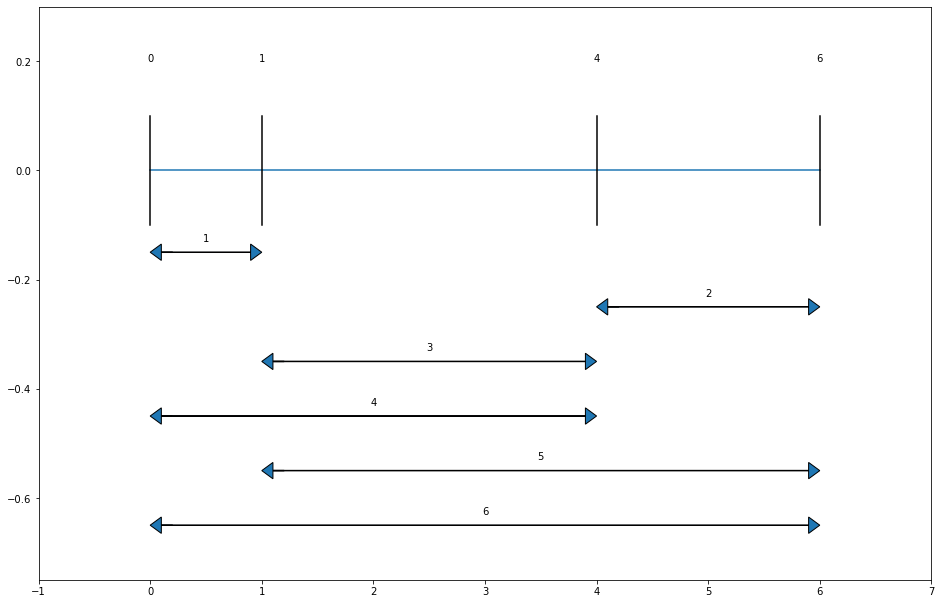

 *                      9  0.00s                  2  = x_1


 ! ----------------------------------------------------------------------------
 ! Search completed, 2 solutions found.
 ! ----------------------------------------------------------------------------
 ! Number of branches     : 10
 ! Number of fails        : 4
 ! Total memory usage     : 542.1 kB (502.4 kB CP Optimizer + 39.7 kB Concert)
 ! Time spent in solve    : 0.00s (0.00s engine + 0.00s extraction)
 ! Search speed (br. / s) : 1000.0
 ! ----------------------------------------------------------------------------


In [18]:
model,x = decision_model(6,4) 
lsols = model.start_search(SearchType='DepthFirst',  DefaultInferenceLevel='Low')
for sol in lsols:
    display_golomb([sol[m] for m in x])

 ! ----------------------------------------------------------------------------
 ! Satisfiability problem - 4 variables, 7 constraints
 ! Workers              = 1
 ! DefaultInferenceLevel = Low
 ! Presolve             = Off
 ! SearchType           = DepthFirst
 ! Initial process time : 0.00s (0.00s extraction + 0.00s propagation)
 !  . Log search space  : 11.2 (before), 11.2 (after)
 !  . Memory usage      : 298.9 kB (before), 298.9 kB (after)
 ! Using sequential search.
 ! ----------------------------------------------------------------------------
 !               Branches  Non-fixed            Branch decision
 *                      3  0.00s                  3 != x_2


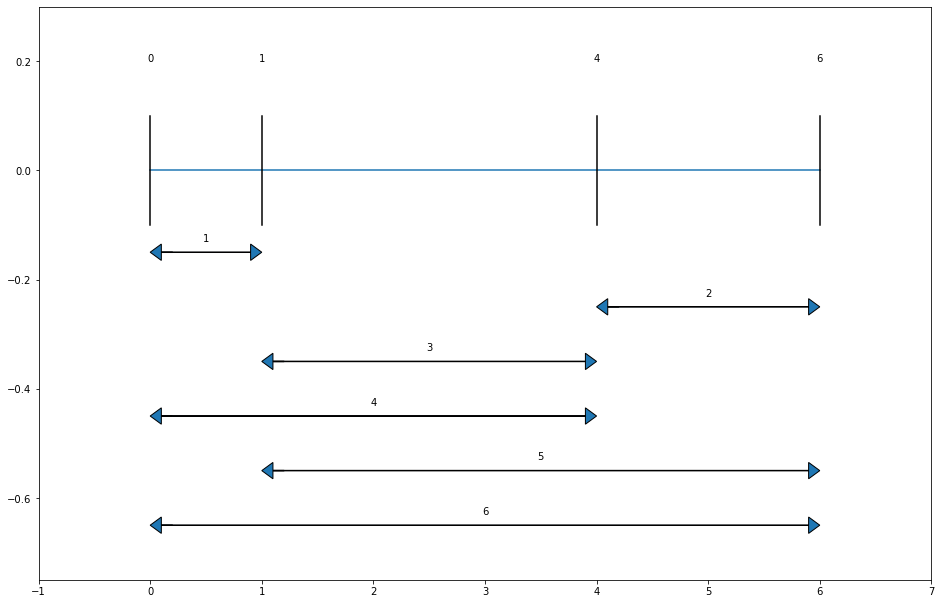

 ! ----------------------------------------------------------------------------
 ! Search completed, 1 solution found.
 ! ----------------------------------------------------------------------------
 ! Number of branches     : 4
 ! Number of fails        : 2
 ! Total memory usage     : 542.1 kB (502.4 kB CP Optimizer + 39.7 kB Concert)
 ! Time spent in solve    : 0.00s (0.00s engine + 0.00s extraction)
 ! Search speed (br. / s) : 400.0
 ! ----------------------------------------------------------------------------


In [19]:
model.add(x[0] == 0)
model.add(x[1]-x[0] < x[-1]-x[-2])
lsols = model.start_search(SearchType='DepthFirst',  DefaultInferenceLevel='Low')
for sol in lsols:
    display_golomb([sol[m] for m in x])

Write a new function nosymmetry_optimisation_model(n) that builds a new model that avoids the two symmetries we found so far. 

In [20]:
def nosymmetry_optimisation_model(n):
    model = CpoModel(name="The shortest Golomb ruler of order {} - Symmetry Breaking".format(n))
    marks = model.integer_var_list(n, 0, n*n, 'x') ## G(n) <= n^2
    
    model.add(marks[0] == 0)
    for i in range(n-1):
        model.add(marks[i] < marks[i+1])
                         
    if n > 2 : 
        model.add(marks[1]-marks[0] < marks[n-1]-marks[n-2]) ## 2nd symmetry constraint
        
    model.add(all_diff([marks[i]-marks[j] for i in range(n) for j in range(i)])) 

    model.add(model.minimize(marks[n-1]))
    return model,marks

In [21]:
def run_nosymmetry_model(n,InfLevel):
    print("Build no symmetry model...")
    model,x = nosymmetry_optimisation_model(n)
    sol = model.solve(TimeLimit=120, LogPeriod = 100000,SearchType='DepthFirst',  DefaultInferenceLevel=InfLevel)
    infos = sol.get_solver_infos()
    if sol.get_solve_status() == 'Optimal':
        print("The shortest Golomb ruler of order {} is = {}, total execution time = {}s".format(n,sol.get_objective_values()[0],infos['TotalTime']))
    else:
        print('There is no solution!')
    return model,x,sol

Compare nosymmetry_optimisation_model and basic_optimisation_model for different values of $n$ (you decide the values of $n$). Plot the runtime and the search tree size

In [23]:
basic_runtime, nosym_runtime = [],[]
basic_treesize, nosym_treesize = [],[]
n_settings = np.arange(4,10,1)

for n in n_settings:
    _,_,basic_sol = run_basic_model(n,"Low")
    _,_,nosym_sol = run_nosymmetry_model(n,"Low")
    
    basic_runtime.append(basic_sol.get_solver_infos()['TotalTime'])
    basic_treesize.append(basic_sol.get_solver_infos()['NumberOfChoicePoints'])
    nosym_runtime.append(nosym_sol.get_solver_infos()['TotalTime'])
    nosym_treesize.append(nosym_sol.get_solver_infos()['NumberOfChoicePoints'])

Build basic model...
 ! ----------------------------------------------------------------------------
 ! Minimization problem - 4 variables, 4 constraints
 ! Workers              = 1
 ! DefaultInferenceLevel = Low
 ! Presolve             = Off
 ! SearchType           = DepthFirst
 ! Initial process time : 0.00s (0.00s extraction + 0.00s propagation)
 !  . Log search space  : 16.3 (before), 16.3 (after)
 !  . Memory usage      : 299.0 kB (before), 299.0 kB (after)
 ! Using sequential search.
 ! ----------------------------------------------------------------------------
 !          Best Branches  Non-fixed            Branch decision
                        0          4                 -
 + New bound is 0
 *             7        6  0.00s               (gap is 100.0%)
 *             6       12  0.00s               (gap is 100.0%)
 ! ----------------------------------------------------------------------------
 ! Search completed, 2 solutions found.
 ! Best objective         : 6 (optimal - e

 ! TimeLimit            = 120
 ! Workers              = 1
 ! DefaultInferenceLevel = Low
 ! LogPeriod            = 100000
 ! Presolve             = Off
 ! SearchType           = DepthFirst
 ! Initial process time : 0.00s (0.00s extraction + 0.00s propagation)
 !  . Log search space  : 31.3 (before), 31.3 (after)
 !  . Memory usage      : 299.3 kB (before), 299.3 kB (after)
 ! Using sequential search.
 ! ----------------------------------------------------------------------------
 !          Best Branches  Non-fixed            Branch decision
                        0          6                 -
 + New bound is 0
 *            23       53  0.00s               (gap is 100.0%)
 *            20       69  0.00s               (gap is 100.0%)
 *            18       74  0.00s               (gap is 100.0%)
 *            17       81  0.00s               (gap is 100.0%)
 ! ----------------------------------------------------------------------------
 ! Search completed, 4 solutions found.
 ! Best

              34    22000          2             10  = x_4
              34    23000          2        F     2  = x_1
              34    24000          2        F     3  = x_2
              34    25000          4        F    11  = x_4
              34    26000          4              7 != x_2
              34    27000          3              8 != x_2
              34    28000          3        F     9  = x_2
              34    29000          3        F     6  = x_1
              34    30000          3              6 != x_3
              34    31000          3        F     9  = x_3
 ! Time = 0.12s, Average fail depth = 6, Memory usage = 590.6 kB
 ! Current bound is 0 (gap is 100.0%)
 !          Best Branches  Non-fixed            Branch decision
              34    32000          3        F    14  = x_3
              34    33000          3              2  = x_0
              34    34000          3             10  = x_4
              34    35000          3        F    11  = x_3
       

 *            52    15431  0.06s               (gap is 100.0%)
 ! Time = 0.06s, Average fail depth = 6, Memory usage = 592.7 kB
 ! Current bound is 0 (gap is 100.0%)
 !          Best Branches  Non-fixed            Branch decision
              52    16000          2        F    11 != x_4
              52    17000          2             21 != x_5
              52    18000          3        F     8 != x_3
              52    19000          3        F    12 != x_3
              52    20000          2        F    18  = x_3
              52    21000          3             14 != x_5
 *            50    21973  0.09s               (gap is 100.0%)
              50    22000          1             13 != x_3
              50    23000          3        F    15  = x_2
              50    24000          2        F    10  = x_3
              50    25000          2        F    15  = x_4
              50    26000          2        F    12  = x_3
              50    27000          3             22 != x_5

 ! Current bound is 0 (gap is 100.0%)
 !          Best Branches  Non-fixed            Branch decision
              44     131k          3             19 != x_4
              44     132k          3             13 != x_2
              44     133k          3             11  = x_4
              44     134k          3        F    10 != x_4
              44     135k          3        F     3  = x_1
              44     136k          3        F     3  = x_1
              44     137k          3              7 != x_3
              44     138k          3        F    12 != x_3
              44     139k          3        F    17  = x_3
              44     140k          3             11 != x_4
              44     141k          2        F     9  = x_3
              44     142k          3              2  = x_1
              44     143k          2        F    27  = x_3
              44     144k          3             17 != x_4
              44     145k          3        F     6 != x_2
             

              44     252k          3        F    25 != x_4
              44     253k          3              9 != x_4
              44     254k          4        F     7  = x_4
              44     255k          4             11  = x_4
              44     256k          4              2  = x_0
              44     257k          3             20 != x_5
              44     258k          3             11 != x_4
              44     259k          3        F     3  = x_1
              44     260k          3              5 != x_2
              44     261k          3        F    22  = x_4
              44     262k          3              5 != x_0
              44     263k          3        F    23  = x_4
              44     264k          3             14  = x_4
              44     265k          3        F     4  = x_0
              44     266k          3             11 != x_4
              44     267k          3        F     9  = x_4
              44     268k          3              4 != x

              44     374k          3              5 != x_1
              44     375k          3        F    20  = x_3
              44     376k          3        F    10  = x_2
              44     377k          3        F    27 != x_4
              44     378k          3             18  = x_4
              44     379k          3             15 != x_3
              44     380k          3             15 != x_2
              44     381k          3             11  = x_1
              44     382k          3        F    13  = x_3
              44     383k          3        F    16 != x_3
              44     384k          3              3  = x_0
              44     385k          3        F    22  = x_4
              44     386k          3             24 != x_4
              44     387k          3              6  = x_2
              44     388k          2        F    13  = x_3
              44     389k          2        F    11  = x_3
              44     390k          3             17 != x

              44     496k          3        F    13 != x_1
              44     497k          3             15 != x_3
              44     498k          3        F    22  = x_3
              44     499k          3              2 != x_1
              44     500k          3              6 != x_3
              44     501k          3        F     4  = x_2
              44     502k          3        F    18  = x_2
              44     503k          3        F    27 != x_4
              44     504k          2              1 != x_0
              44     505k          3        F    11 != x_2
              44     506k          4              9 != x_3
              44     507k          3        F     6 != x_1
              44     508k          2        F    13  = x_2
              44     509k          3        F    21  = x_3
              44     510k          3              9  = x_4
 ! Time = 2.57s, Average fail depth = 6, Memory usage = 658.8 kB
 ! Current bound is 0 (gap is 100.0%)
 !          

              44     618k          3              2 != x_0
              44     619k          3        F    21 != x_2
              44     620k          3             12 != x_2
              44     621k          3             20 != x_4
              44     622k          2        F    13 != x_1
              44     623k          2             22 != x_4
              44     624k          2        F    13  = x_3
              44     625k          3        F     8 != x_1
              44     626k          3        F     8  = x_1
              44     627k          2        F     2  = x_0
              44     628k          3        F    16 != x_2
              44     629k          2        F    22  = x_4
              44     630k          3              9  = x_5
 ! Time = 3.18s, Average fail depth = 6, Memory usage = 658.8 kB
 ! Current bound is 0 (gap is 100.0%)
 !          Best Branches  Non-fixed            Branch decision
              44     631k          3        F     8 != x_1
       

What's your impression about symmetries? 

## Implied Constraints

An implied constraint is one that can be dedused by looking at the original constraints of the problem. 

For instance, if we have $a<b $ and $b<c$, one can infer that $a<c$. 

Such constraints (called also redundant constraints) can help the solver to prune further the search tree. 



In our problem there is an implied constraint. Can you find it? Please check with of the supervisors. 



Write a new function nosymmetry2_optimisation_model(n) that adds the implied constraint to the nosymmetry_optimisation_model(n) and returns the new model 

In [24]:
def nosymmetry2_optimisation_model(n):
    model = CpoModel(name="The shortest Golomb ruler of order {} - Symmetry Breaking".format(n))
    marks = model.integer_var_list(n, 0, n*n, 'x') ## G(n) <= n^2
    
    model.add(marks[0] == 0)
    for i in range(n-1):
        model.add(marks[i] < marks[i+1])
            
    if n > 2 :
        model.add(marks[1]-marks[0] < marks[n-1]-marks[n-2]) ## no symmetry constraint

    model.add(all_diff(marks))
    model.add(all_diff([marks[i]-marks[j] for i in range(n) for j in range(i)])) 
    
    model.add(model.minimize(marks[n-1]))
    return model,marks

In [25]:
def run_nosymmetry2_model(n,InfLevel):
    print("Build no symmetry model version 2 (with implied constraints)...")
    model,x = nosymmetry2_optimisation_model(n)
    sol = model.solve(TimeLimit=120, LogPeriod = 100000,SearchType='DepthFirst',  DefaultInferenceLevel=InfLevel)
    infos = sol.get_solver_infos()
    if sol.get_solve_status() == 'Optimal':
        print("The shortest Golomb ruler of order {} is = {}, total execution time = {}s".format(n,sol.get_objective_values()[0],infos['TotalTime']))
    else:
        print('There is no solution!')
    return model,x,sol

Compare nosymmetry2_optimisation_model and nosymmetry_optimisation_model 

In [26]:
nosym2_runtime, nosym_runtime = [],[]
nosym2_treesize, nosym_treesize = [],[]
n_settings = np.arange(4,12,1)

for n in n_settings:
    _,_,nosym_sol = run_nosymmetry_model(n,"Extended")
    _,_,nosym2_sol = run_nosymmetry2_model(n,"Extended")
    
    nosym_runtime.append(nosym_sol.get_solver_infos()['TotalTime'])
    nosym_treesize.append(nosym_sol.get_solver_infos()['NumberOfChoicePoints'])
    nosym2_runtime.append(nosym2_sol.get_solver_infos()['TotalTime'])
    nosym2_treesize.append(nosym2_sol.get_solver_infos()['NumberOfChoicePoints'])

Build no symmetry model...
 ! ----------------------------------------------------------------------------
 ! Minimization problem - 4 variables, 6 constraints
 ! TimeLimit            = 120
 ! Workers              = 1
 ! DefaultInferenceLevel = Extended
 ! LogPeriod            = 100000
 ! Presolve             = Off
 ! SearchType           = DepthFirst
 ! Initial process time : 0.00s (0.00s extraction + 0.00s propagation)
 !  . Log search space  : 16.3 (before), 16.3 (after)
 !  . Memory usage      : 299.0 kB (before), 299.0 kB (after)
 ! Using sequential search.
 ! ----------------------------------------------------------------------------
 !          Best Branches  Non-fixed            Branch decision
                        0          4                 -
 + New bound is 0
 *             7        8  0.00s               (gap is 100.0%)
 *             6       14  0.00s               (gap is 100.0%)
 ! ----------------------------------------------------------------------------
 ! Searc

 ! ----------------------------------------------------------------------------
The shortest Golomb ruler of order 6 is = 17, total execution time = 0.00999999s
Build no symmetry model version 2 (with implied constraints)...
 ! ----------------------------------------------------------------------------
 ! Minimization problem - 6 variables, 9 constraints
 ! TimeLimit            = 120
 ! Workers              = 1
 ! DefaultInferenceLevel = Extended
 ! LogPeriod            = 100000
 ! Presolve             = Off
 ! SearchType           = DepthFirst
 ! Initial process time : 0.00s (0.00s extraction + 0.00s propagation)
 !  . Log search space  : 31.3 (before), 31.3 (after)
 !  . Memory usage      : 299.3 kB (before), 299.3 kB (after)
 ! Using sequential search.
 ! ----------------------------------------------------------------------------
 !          Best Branches  Non-fixed            Branch decision
                        0          6                 -
 + New bound is 0
 *            23

 !          Best Branches  Non-fixed            Branch decision
                        0          8                 -
 + New bound is 0
 *            51     1050  0.00s               (gap is 100.0%)
 *            42     1339  0.00s               (gap is 100.0%)
 *            41     1433  0.00s               (gap is 100.0%)
 *            40     1775  0.01s               (gap is 100.0%)
 *            39     2246  0.01s               (gap is 100.0%)
 *            36     2661  0.01s               (gap is 100.0%)
 *            35     4260  0.03s               (gap is 100.0%)
 *            34     4556  0.03s               (gap is 100.0%)
 ! ----------------------------------------------------------------------------
 ! Search completed, 8 solutions found.
 ! Best objective         : 34 (optimal - effective tol. is 0)
 ! Best bound             : 0
 ! ----------------------------------------------------------------------------
 ! Number of branches     : 8092
 ! Number of fails        : 4039


 ! ----------------------------------------------------------------------------
 !          Best Branches  Non-fixed            Branch decision
                        0         10                 -
 + New bound is 0
 *            72    36189  0.45s               (gap is 100.0%)
 *            71    70379  0.88s               (gap is 100.0%)
 *            70    75128  0.94s               (gap is 100.0%)
 *            64    95023  1.19s               (gap is 100.0%)
              64     100k          1             12 != x_4
 *            60     157k  1.98s               (gap is 100.0%)
              60     200k          2             20 != x_5
 *            55     203k  2.55s               (gap is 100.0%)
              55     300k          3             29  = x_5
              55     400k          3        F    20  = x_6
 ! ----------------------------------------------------------------------------
 ! Search completed, 6 solutions found.
 ! Best objective         : 55 (optimal - effecti

KeyboardInterrupt: 

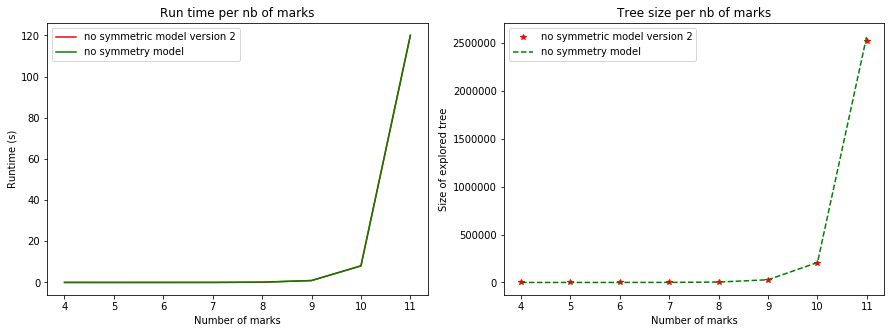

In [27]:
plt.figure(figsize=(15,5))

plt.subplot(121)
plt.plot(n_settings,nosym2_runtime,'r',label='no symmetric model version 2')
plt.plot(n_settings,nosym_runtime,'g',label='no symmetry model')
plt.xlabel("Number of marks")
plt.ylabel("Runtime (s)")
plt.legend(loc='best')
plt.title("Run time per nb of marks")

plt.subplot(122)
plt.plot(n_settings,nosym2_treesize,'r*',label='no symmetric model version 2')
plt.plot(n_settings,nosym_treesize,'g--',label='no symmetry model')
plt.xlabel("Number of marks")
plt.ylabel("Size of explored tree")
plt.title("Tree size per nb of marks")
plt.legend(loc='best')


plt.show()

# Randomisation and Restarts

Declare two search strategies: One that uses a lexicographical order on both variables and values, 
    and the other using an impact-based choice on the variables with a random value selection.     

Run the two strategies using the nosymmetry2_optimisation_model for different values of $n$

In [ ]:
def run_both_strategies(n, SearchType='DepthFirst'):
    test_model_1,x = nosymmetry2_optimisation_model(n)
    ### Add strategy 1
    SearchPhase1 = test_model_1.search_phase(x, 
                                    varchooser=test_model_1.select_smallest(test_model_1.var_index(x)),
                                    valuechooser=test_model_1.select_smallest(test_model_1.value_index(np.arange(n))))
    test_model_1.add(SearchPhase1)
    ### Solve model
    sol_1 = test_model_1.solve(SearchType=SearchType,  DefaultInferenceLevel="Medium")


    test_model_2,x = nosymmetry2_optimisation_model(n)
    ### Add strategy 2
    SearchPhase2 = test_model_2.search_phase(x, 
                                    varchooser=test_model_2.select_smallest(test_model_2.var_impact()),
                                    valuechooser=test_model_2.select_random_value())
    test_model_2.add(SearchPhase2)
    ### Solve model
    sol_2 = test_model_2.solve(SearchType=SearchType,  DefaultInferenceLevel="Medium")
    return sol_1, sol_2

In [40]:
stra1_runtime, stra2_runtime = [],[]
stra1_treesize, stra2_treesize = [],[]
n_settings = np.arange(4,11,1)

for n in n_settings:
    sol_1,sol_2 = run_both_strategies(n,'DepthFirst')
    sol_1,sol_2 = run_both_strategies(n,'DepthFirst')
    
    stra1_runtime.append(sol_1.get_solver_infos()['TotalTime'])
    stra1_treesize.append(sol_1.get_solver_infos()['NumberOfChoicePoints'])
    stra2_runtime.append(sol_2.get_solver_infos()['TotalTime'])
    stra2_treesize.append(sol_2.get_solver_infos()['NumberOfChoicePoints'])

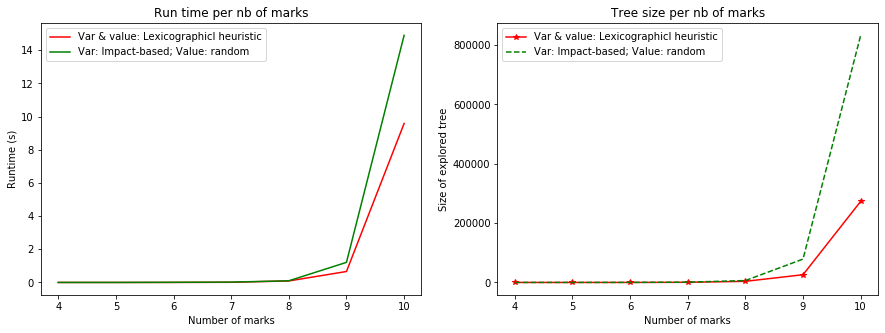

In [41]:
plt.figure(figsize=(15,5))

plt.subplot(121)
plt.plot(n_settings,stra1_runtime,'r',label='Var & value: Lexicographicl heuristic')
plt.plot(n_settings,stra2_runtime,'g',label='Var: Impact-based; Value: random')
plt.xlabel("Number of marks")
plt.ylabel("Runtime (s)")
plt.legend(loc='best')
plt.title("Run time per nb of marks")

plt.subplot(122)
plt.plot(n_settings,stra1_treesize,'r*-',label='Var & value: Lexicographicl heuristic')
plt.plot(n_settings,stra2_treesize,'g--',label='Var: Impact-based; Value: random')
plt.xlabel("Number of marks")
plt.ylabel("Size of explored tree")
plt.title("Tree size per nb of marks")
plt.legend(loc='best')


plt.show()

### The magic of restarts


Combinatorial search exhibits usually a bad behaviour in the runtime distribution called **heavy tailed phenomenon**. 
That is, at any node of the search tree, there is a non-negligeable probability that the time needed to explore the current subtree is heavier than 
an exponential distribution (you can read about it here https://aaai.org/Papers/AAAI/1998/AAAI98-061.pdf. 


A simple solution to deal with such a bad behaviour is to restart search from time to time. 
CPOptimizer offers this choice by using the parameter: 
    
```
    SearchType= 'Restart'
```



Using a restart search, evaluate the two strategies mentionned above using the nosymmetry2_optimisation_model for different values of $n$. What do you think?  

In [43]:
stra1_restart_runtime, stra2_restart_runtime = [],[]
stra1_restart_treesize, stra2_restart_treesize = [],[]
n_settings = np.arange(4,11,1)

for n in n_settings:
    sol_1,sol_2 = run_both_strategies(n,'Restart')
    sol_1,sol_2 = run_both_strategies(n,'Restart')
    
    stra1_restart_runtime.append(sol_1.get_solver_infos()['TotalTime'])
    stra1_restart_treesize.append(sol_1.get_solver_infos()['NumberOfChoicePoints'])
    stra2_restart_runtime.append(sol_2.get_solver_infos()['TotalTime'])
    stra2_restart_treesize.append(sol_2.get_solver_infos()['NumberOfChoicePoints'])

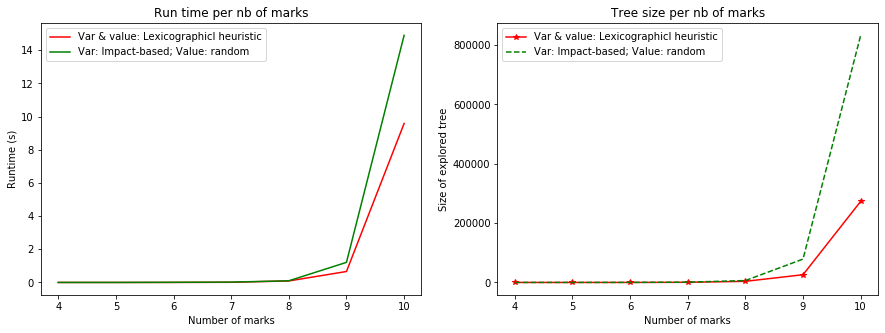

In [44]:
plt.figure(figsize=(15,5))

plt.subplot(121)
plt.plot(n_settings,stra1_runtime,'r',label='Var & value: Lexicographicl heuristic')
plt.plot(n_settings,stra2_runtime,'g',label='Var: Impact-based; Value: random')
plt.xlabel("Number of marks")
plt.ylabel("Runtime (s)")
plt.legend(loc='best')
plt.title("Run time per nb of marks")

plt.subplot(122)
plt.plot(n_settings,stra1_treesize,'r*-',label='Var & value: Lexicographicl heuristic')
plt.plot(n_settings,stra2_treesize,'g--',label='Var: Impact-based; Value: random')
plt.xlabel("Number of marks")
plt.ylabel("Size of explored tree")
plt.title("Tree size per nb of marks")
plt.legend(loc='best')


plt.show()

What is the maximum value of $n$ for which you can solve this problem? Use all your techniques! 

In [ ]:
### WARNING : This block takes a lot of time to execute
# A lot of configurations try for instance 


What did you learn today? 